In [3]:
import pandas as pd

In [395]:
import scipy, scipy.stats

In [ ]:
import matplotlib.pyplot as plt

In [79]:
%matplotlib inline

In [4]:
SP500Data = pd.read_csv("/Users/sonlinhphuvan/Documents/notebooks/startup_ml_challenge/SP500_A.csv",header=None)

In [5]:
SP500Data.size

3812

In [118]:
SP500Data.head(5)

,Price,Delta,PriceSTD,PriceSTD2
0,-0.010736,NaN,NaN,NaN
1,-0.002669,0.008067,NaN,NaN
2,-0.008246,-0.005577,NaN,NaN
3,-0.029663,-0.021417,NaN,NaN
4,0.012417,0.042080,NaN,NaN


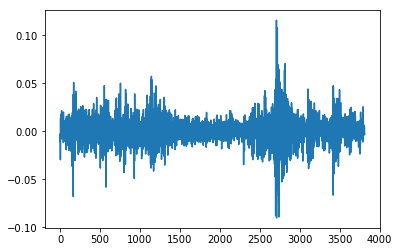

In [9]:
plt.plot(SP500Data)

In [12]:
type(SP500Data)

pandas.core.frame.DataFrame

In [14]:
SP500Data.columns = ['Price']

In [15]:
SP500Data.head(5)

,Price
0,-0.010736
1,-0.002669
2,-0.008246
3,-0.029663
4,0.012417


In [16]:
SP500Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 1 columns):
Price    3812 non-null float64
dtypes: float64(1)
memory usage: 29.9 KB


In [17]:
SP500Data.describe()

,Price
count,3812.000000
mean,0.000212
std,0.013266
min,-0.090350
25%,-0.005978
50%,0.000534
75%,0.006394
max,0.115800


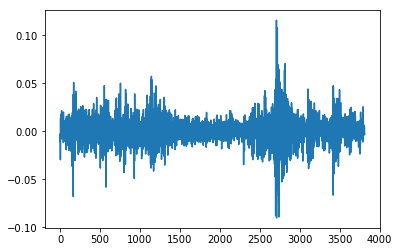

In [82]:
plt.plot(SP500Data['Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116593ac8>]], dtype=object)

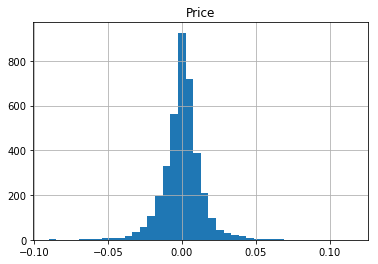

In [22]:
SP500Data.hist(bins=40)

The distribution seems to be close to normal distribution

In [48]:
SP500Data.columns

Index(['Price'], dtype='object')

In [49]:
SP500Data['Delta'] = SP500Data.diff(1)

In [63]:
SP500Data.columns

Index(['Price', 'Delta'], dtype='object')

In [60]:
SP500Data['Delta'].describe()

count    3811.000000
mean        0.000002
std         0.019450
min        -0.121122
25%        -0.009994
50%        -0.000558
75%         0.009878
max         0.142100
Name: Delta, dtype: float64

In [62]:
SP500Data['Price'].describe()

count    3812.000000
mean        0.000212
std         0.013266
min        -0.090350
25%        -0.005978
50%         0.000534
75%         0.006394
max         0.115800
Name: Price, dtype: float64

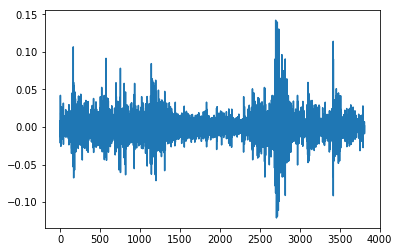

In [83]:
plt.plot(SP500Data['Delta'])

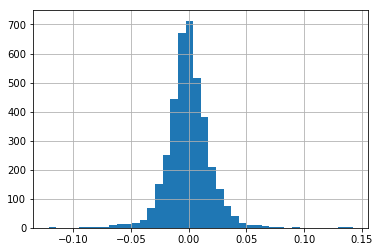

In [64]:
SP500Data['Delta'].hist(bins=40)

Note: the standard deviation, min, max, and distribution of the raw data and the deltas do not seem to be very different.  There does not seem to be an advantage in using either for predictive purposes

In [73]:
SP500Data['PriceSTD'] = SP500Data['Price'].rolling(window=100).std()

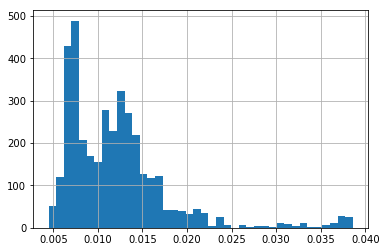

In [110]:
SP500Data['PriceSTD'].hist(bins=40)

The distribution of the standard deviation (or volatility) from Price shows a lognormal distribution for a rolling window of 100. This implies that the Price's statistical characteristics (such as volatility) are not stationnary.

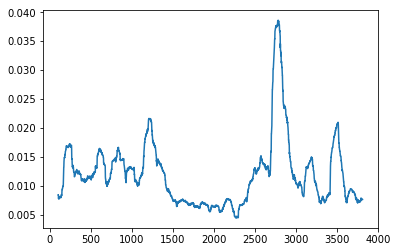

In [85]:
plt.plot(SP500Data['PriceSTD'])

In [77]:
SP500Data['PriceSTD2'] = SP500Data['PriceSTD'].rolling(window=100).std()

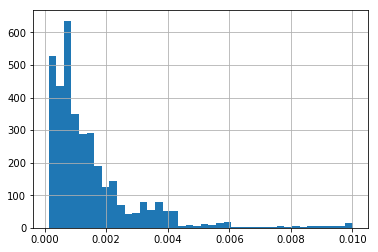

In [78]:
SP500Data['PriceSTD2'].hist(bins=40)

The distribution of the standard deviation of standard deviation of the Price seem to match that of an exponentially decreasing function

In [108]:
SP500Data_Index = SP500Data.index.values

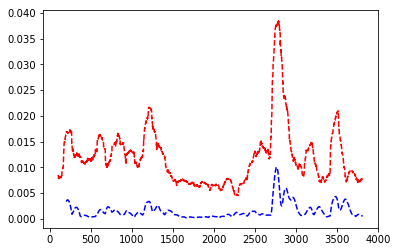

In [109]:
plt.plot(SP500Data_Index, SP500Data['PriceSTD'],'r--', SP500Data_Index, SP500Data['PriceSTD2'],'b--')

The STD and the STD of the STD shows the same behavior over time.  There does seem to be much advantage using the information contained in the STD of the STD for predictive purpose since the seem to be highly correlated.  It should be interesting to see if STD2 can predict STD. 

A possible approach:

1. Fit the Price standard deviation "PriceSTD" to a lognormal statistical model
2. For each step in the Price vector, use the rolling STD to adjust the lognormal model for that step
3. Select a random number from that adjusted lognormal model in the previous step
4. That will be predicted Price for the time step
5. Repeat for all the Price values
6. Calculate the error for each step by calculating the square difference between the predicted Price and the actual Price.  This is the overall performance measure of the approach.  Calculate statistics of the error measured.

In [418]:
temp00 = pd.DataFrame((SP500Data['PriceSTD']))

In [419]:
temp00.min()

PriceSTD    0.004466
dtype: float64

In [420]:
temp00.iloc[99:102]

,PriceSTD
99,0.008454
100,0.008369
101,0.008360


In [421]:
SP500Data.columns

Index(['Price', 'Delta', 'PriceSTD', 'PriceSTD2'], dtype='object')

In [422]:
temp00.min().values

array([ 0.00446563])

In [423]:
filter_values = np.linspace(temp00.min().values, temp00.max().values, num=40)

In [424]:
out = pd.Series(pd.cut(temp00, bins = filter_values))

In [425]:
counts = pd.value_counts(out)

In [426]:
counts1 = counts.reindex(out.cat.categories).as_matrix()

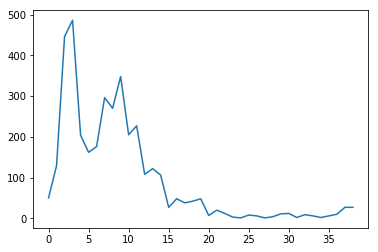

In [427]:
plt.plot(counts1)

In [428]:
dist_names = ['lognorm']

In [429]:
dist = getattr(scipy.stats, dist_name)

In [430]:
param = dist.fit(counts1)

In [431]:
param

(0.52617006688809931, 0.99999999999999989, 98.401122850620339)

In [441]:
x=scipy.arange(40)

In [442]:
pdf_fitted = dist.pdf(x, *param[:-2],loc=param[-2], scale=param[-1])*40

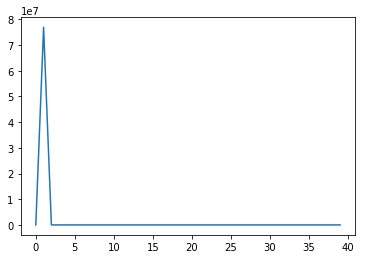

In [443]:
plt.plot(pdf_fitted, label=dist_name)

(0, 10)

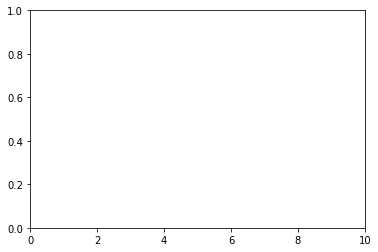

In [444]:
plt.xlim(0,10)

Note:  There is an error in the model fitting.

Note:  I have run out of time to complete the analysis.  Unfortunately, due to work schedule I was not able to get to work on this challenge until yesterday afternoon.